In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib.colors import Normalize
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [64]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel('/content/drive/My Drive/Colab Notebooks/aiida_ads_data_june21 (1).xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df

,cof,o2_1bar,o2_5bar,o2_10bar,o2_20bar,o2_30bar,o2_50bar,o2_80bar,o2_100bar,o2_140bar,...,kr_henry_unit,ch4_1bar,ch4_5.8bar,ch4_20bar,ch4_35bar,ch4_50bar,ch4_65bar,ch4_henry,ch4_ads_unit,ch4_henry_unit
0,05001N2.cif,0.255547,1.254577,2.214238,4.104295,5.714396,8.314797,11.260444,12.841472,15.455354,...,mol/kg/Pa,0.691743,3.117101,7.471030,10.366619,12.476683,14.088227,0.000007,mol/kg,mol/kg/Pa
1,07000N2.cif,0.315086,1.382063,2.527546,4.298674,5.772219,7.934619,10.317892,11.689791,13.708728,...,mol/kg/Pa,0.987265,3.716261,7.246518,9.382887,10.978795,12.336075,0.000011,mol/kg,mol/kg/Pa
2,07001N2.cif,0.297510,1.476718,2.717850,5.191666,7.335330,10.931670,15.271923,17.595517,21.518473,...,mol/kg/Pa,0.680910,3.450869,9.386673,13.526087,16.671249,18.903311,0.000007,mol/kg,mol/kg/Pa
3,07002N2.cif,0.754916,2.175336,2.887699,3.514006,3.820026,4.190089,4.483099,4.633660,4.792606,...,mol/kg/Pa,2.652672,3.709332,4.042268,4.129984,4.192106,4.199892,0.000092,mol/kg,mol/kg/Pa
4,07010N3.cif,0.313453,1.416540,2.554761,4.597805,6.082776,8.543897,11.346283,12.781797,14.937217,...,mol/kg/Pa,0.926343,3.969798,8.461671,11.120165,12.925870,14.255221,0.000010,mol/kg,mol/kg/Pa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,21311N3.cif,0.264278,1.275172,2.382566,4.527663,6.461819,9.617781,13.333701,15.481411,18.837978,...,mol/kg/Pa,0.612716,3.076514,8.289316,11.918748,14.691433,16.849479,0.000006,mol/kg,mol/kg/Pa
568,21312N2.cif,0.245459,1.215057,2.314249,4.465227,6.507345,9.940613,14.346438,16.789536,21.136341,...,mol/kg/Pa,0.483933,2.609005,7.926626,11.940731,15.238004,17.846858,0.000005,mol/kg,mol/kg/Pa
569,21314N2.cif,0.493256,2.030808,3.432336,5.069255,6.033365,7.243774,8.159466,8.554755,9.138894,...,mol/kg/Pa,2.001987,5.432082,7.292058,7.844259,8.173740,8.395911,0.000025,mol/kg,mol/kg/Pa
570,21315N3.cif,0.532120,2.145694,3.633922,5.629607,7.034819,8.898163,10.498990,11.151895,12.135166,...,mol/kg/Pa,1.794932,5.483564,8.958389,10.308903,10.985826,11.458662,0.000030,mol/kg,mol/kg/Pa


In [66]:
materials = df.iloc[:, 0]
materials

0      05001N2.cif
1      07000N2.cif
2      07001N2.cif
3      07002N2.cif
4      07010N3.cif
          ...     
567    21311N3.cif
568    21312N2.cif
569    21314N2.cif
570    21315N3.cif
571    21320N2.cif
Name: cof, Length: 572, dtype: object

In [67]:
cols = ["o2_5bar",
	              "o2_140bar",
	              "co2_0.001bar",
	              "co2_30bar",
	              "n2_0.001bar",
	              "n2_30bar",
	              "h2_77K_5bar",
	              "h2_77K_100bar",
	              "h2_298K_5bar",
	              "h2_298K_100bar",
	              "ch4_65bar",
	              "ch4_5.8bar",
			          "h2o_henry",
	              "h2s_henry",
	              "xe_henry",
	              "kr_henry",
	              ]
df = df[cols]

In [68]:
df['h2o_henry']

0      0.001612
1      0.000004
2      0.000004
3      0.000004
4      0.000019
         ...   
567    0.000018
568    0.000005
569    0.000015
570    0.000012
571    0.000004
Name: h2o_henry, Length: 572, dtype: float64

In [69]:
cols = ["h2o_henry", "h2s_henry", "xe_henry", "kr_henry"]

for col in cols:
    # convert units from mol/(kg-Pa) to mol/(kg-bar)
    df[col] = 1e5 * df[col]
    # log-10 transform
    df[col] = np.log10(df[col])

<ipython-input-69-1819101d3b34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = 1e5 * df[col]
<ipython-input-69-1819101d3b34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log10(df[col])


In [70]:
df['h2o_henry']

0      2.207484
1     -0.445712
2     -0.391475
3     -0.354918
4      0.280658
         ...   
567    0.260563
568   -0.334875
569    0.179575
570    0.095229
571   -0.395060
Name: h2o_henry, Length: 572, dtype: float64

In [71]:
count=0
for i in df.columns:
  if df[i].dtype==object:
    count=count+1
    print("The column is:",i)
print("Number of object is:",count)

Number of object is: 0


In [72]:
mean=np.mean(df,axis=0)
std=np.std(df,axis=0)
df=(df-mean)/std

In [73]:
df

,o2_5bar,o2_140bar,co2_0.001bar,co2_30bar,n2_0.001bar,n2_30bar,h2_77K_5bar,h2_77K_100bar,h2_298K_5bar,h2_298K_100bar,ch4_65bar,ch4_5.8bar,h2o_henry,h2s_henry,xe_henry,kr_henry
0,-0.342450,-0.135550,-0.124830,-0.342471,-0.379907,-0.395084,-0.244487,-0.110609,-0.152585,-0.136122,-0.111682,-0.390462,1.964942,0.231432,-0.027823,-0.211958
1,-0.102921,-0.323744,-0.133909,-0.097448,0.344207,-0.061025,-0.341830,-0.244654,-0.271753,-0.268785,-0.354090,0.115262,-0.748941,0.427433,0.652195,0.481568
2,0.074921,0.517735,-0.267567,0.083502,-0.089425,0.193598,0.465079,0.500358,0.494984,0.489342,0.554478,-0.108743,-0.693463,-0.655358,-0.545297,-0.367633
3,1.387521,-1.284432,1.076594,-1.541593,2.687878,-0.912869,-1.411663,-1.142636,-0.837130,-0.990423,-1.479720,0.109414,-0.656070,3.644517,4.587153,4.303235
4,-0.038144,-0.191377,-0.173223,0.158374,0.318785,0.091622,-0.223956,-0.246756,-0.257552,-0.236677,-0.088578,0.329262,-0.005956,0.635480,0.474369,0.428807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-0.303754,0.228919,-0.235514,0.719745,0.172097,0.288829,0.026185,0.221885,0.246434,0.233486,0.270334,-0.424719,-0.026511,-0.721831,-0.584683,-0.534294
568,-0.416701,0.476562,-0.361889,-0.215902,-0.230646,-0.029966,-0.010072,0.548696,0.531595,0.579184,0.408320,-0.819323,-0.635568,-1.302073,-1.174012,-1.012817
569,1.115975,-0.816131,0.384060,-0.974697,2.493414,-0.052393,-0.293836,-0.838491,-0.657949,-0.731173,-0.899206,1.563511,-0.109351,1.788664,2.004018,1.970118
570,1.331828,-0.493291,0.752094,-0.530517,2.276128,0.305320,0.319793,-0.575505,-0.417723,-0.515552,-0.475479,1.606964,-0.195627,2.310690,2.618184,2.336355


In [74]:
print(df.columns)

Index(['o2_5bar', 'o2_140bar', 'co2_0.001bar', 'co2_30bar', 'n2_0.001bar',
       'n2_30bar', 'h2_77K_5bar', 'h2_77K_100bar', 'h2_298K_5bar',
       'h2_298K_100bar', 'ch4_65bar', 'ch4_5.8bar', 'h2o_henry', 'h2s_henry',
       'xe_henry', 'kr_henry'],
      dtype='object')


In [75]:
A=df.to_numpy()

In [76]:
A

array([[-0.34245023, -0.13554957, -0.12482951, ...,  0.23143167,
        -0.02782335, -0.21195803],
       [-0.10292137, -0.32374389, -0.13390933, ...,  0.42743322,
         0.65219484,  0.48156778],
       [ 0.07492106,  0.51773534, -0.26756666, ..., -0.65535772,
        -0.5452968 , -0.36763323],
       ...,
       [ 1.11597482, -0.81613127,  0.38406032, ...,  1.78866356,
         2.00401787,  1.97011821],
       [ 1.33182773, -0.49329099,  0.75209444, ...,  2.31069   ,
         2.61818426,  2.33635532],
       [-0.16585774,  0.24072324, -0.27827858, ..., -0.84270815,
        -0.70460482, -0.54738989]])

In [77]:
m,n=np.shape(A)
U,S,VT=np.linalg.svd(A)
V=VT.T

In [78]:
S

array([69.68813715, 51.02926689, 25.74184282, 20.08124469, 16.81137668,
       11.17495773,  9.65267106,  6.39490658,  5.78635249,  4.62297618,
        3.80481302,  3.1761876 ,  1.90836772,  0.8516139 ,  0.45435734,
        0.3399096 ])

In [79]:
var = []
sum=0
for i in S:
  sum+=i*i
var=(S**2/sum)*100
print("Variance provided by each components:",var)

Variance provided by each components: [5.30642096e+01 2.84526451e+01 7.24041162e+00 4.40621054e+00
 3.08809425e+00 1.36450699e+00 1.01807319e+00 4.46840365e-01
 3.65842167e-01 2.33521731e-01 1.58179656e-01 1.10229104e-01
 3.97931312e-02 7.92445620e-03 2.25568832e-03 1.26244032e-03]


<function matplotlib.pyplot.show(close=None, block=None)>

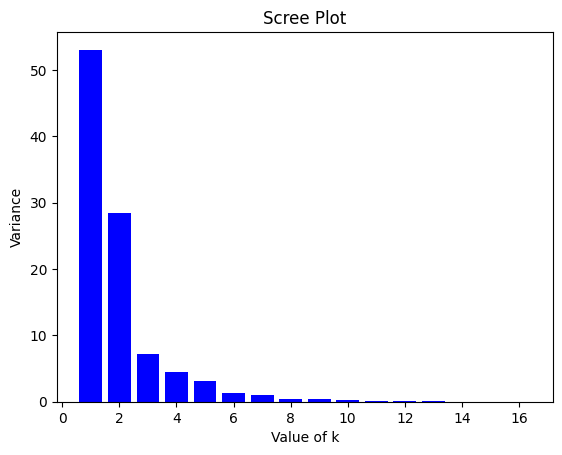

In [80]:
x=np.arange(1,len(var)+1)
plt.bar(x,var, color='blue')
plt.xlabel('Value of k')
plt.ylabel('Variance')
plt.title('Scree Plot')
plt.show

In [81]:
total_var = var[0]+var[1]+var[2]+var[3]
print("Total variance by taking 4 PC components is:",total_var)

Total variance by taking 4 PC components is: 93.16347682079935


In [82]:
pca=PCA(n_components=3)
scores=pca.fit_transform(A)
pca.fit(A)

PCA(n_components=3)

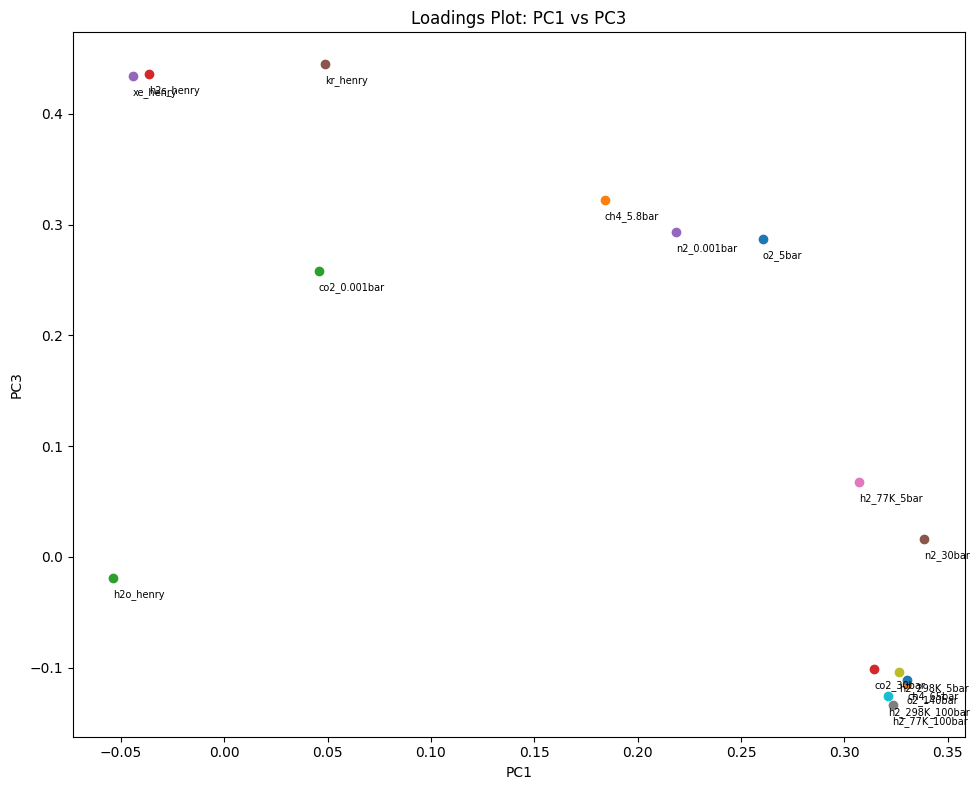

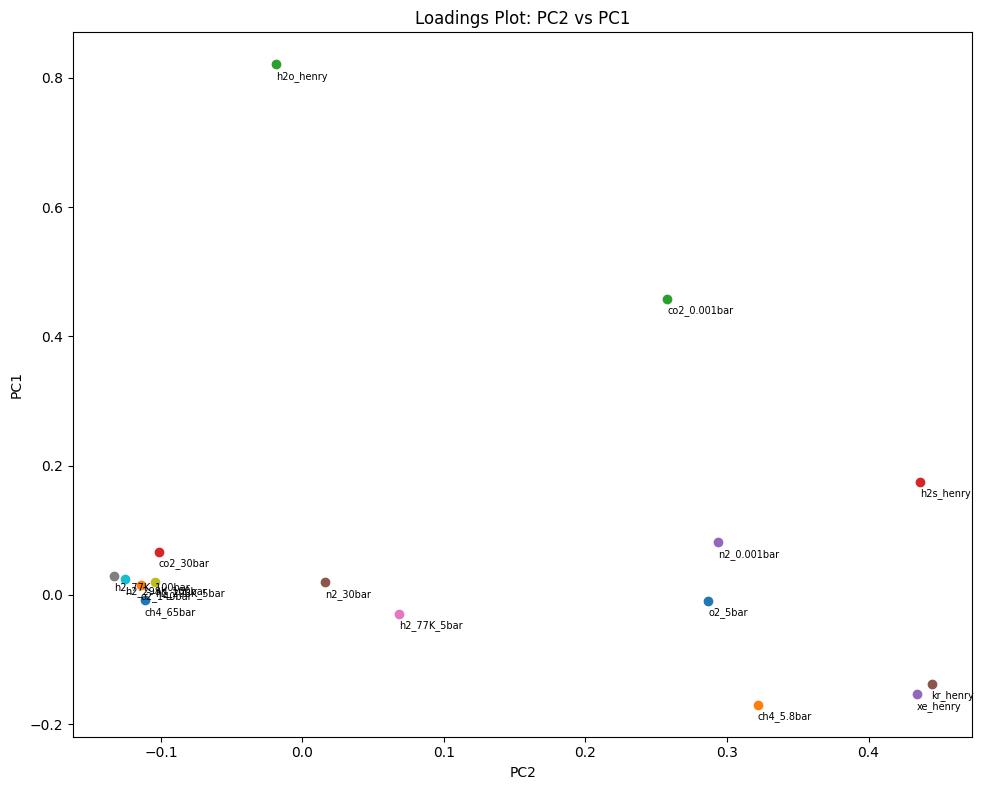

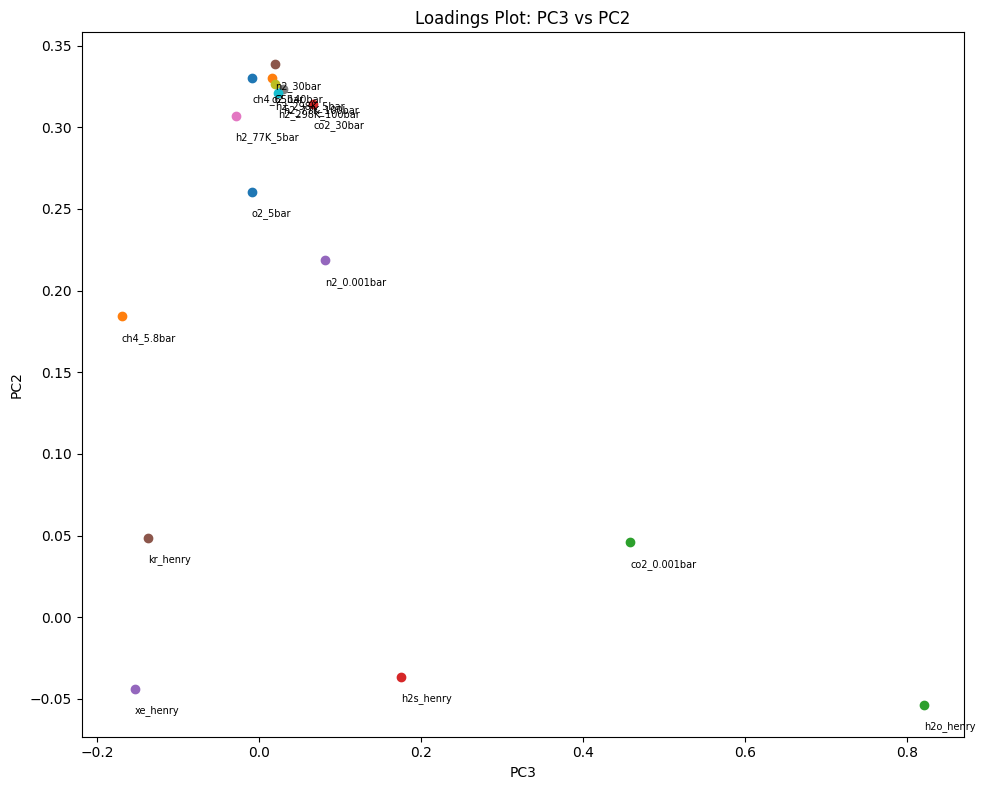

In [83]:
loadings = pca.components_
variable_names = df.columns.tolist()

length = len(loadings)

for j in range(length):
    fig = plt.figure(figsize=(10, 8))

    for i in range(len(variable_names)):
        x = loadings[j, i]
        y = loadings[(j + 1) % length, i]
        plt.scatter(x, y, label=variable_names[i])

        plt.annotate(variable_names[i], (x, y), va='top', fontsize=7, xytext=(x, y - 0.010))

    plt.xlabel(f'PC{j + 1}')
    plt.ylabel(f'PC{(j + 2) % length + 1}')
    plt.title(f'Loadings Plot: PC{j + 1} vs PC{(j + 2) % length + 1}')
    plt.tight_layout()
    plt.show()

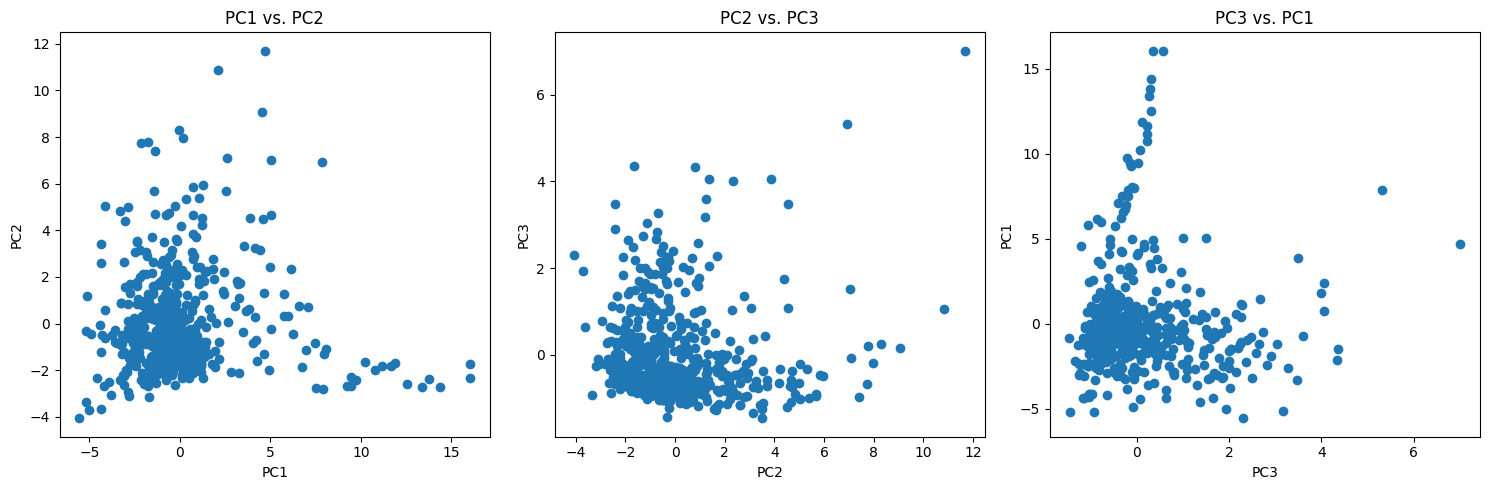

In [84]:
scores = pca.fit_transform(A)
num_pcs = 3

fig, axes = plt.subplots(1,num_pcs,figsize=(15, 5))

for i in range(num_pcs):
    pc1 = i
    pc2 = (i + 1) % num_pcs

    axes[i].scatter(scores[:, pc1], scores[:, pc2])
    axes[i].set_xlabel(f"PC{pc1 + 1}")
    axes[i].set_ylabel(f"PC{pc2 + 1}")
    axes[i].set_title(f"PC{pc1 + 1} vs. PC{pc2 + 1}")

plt.tight_layout()
plt.show()

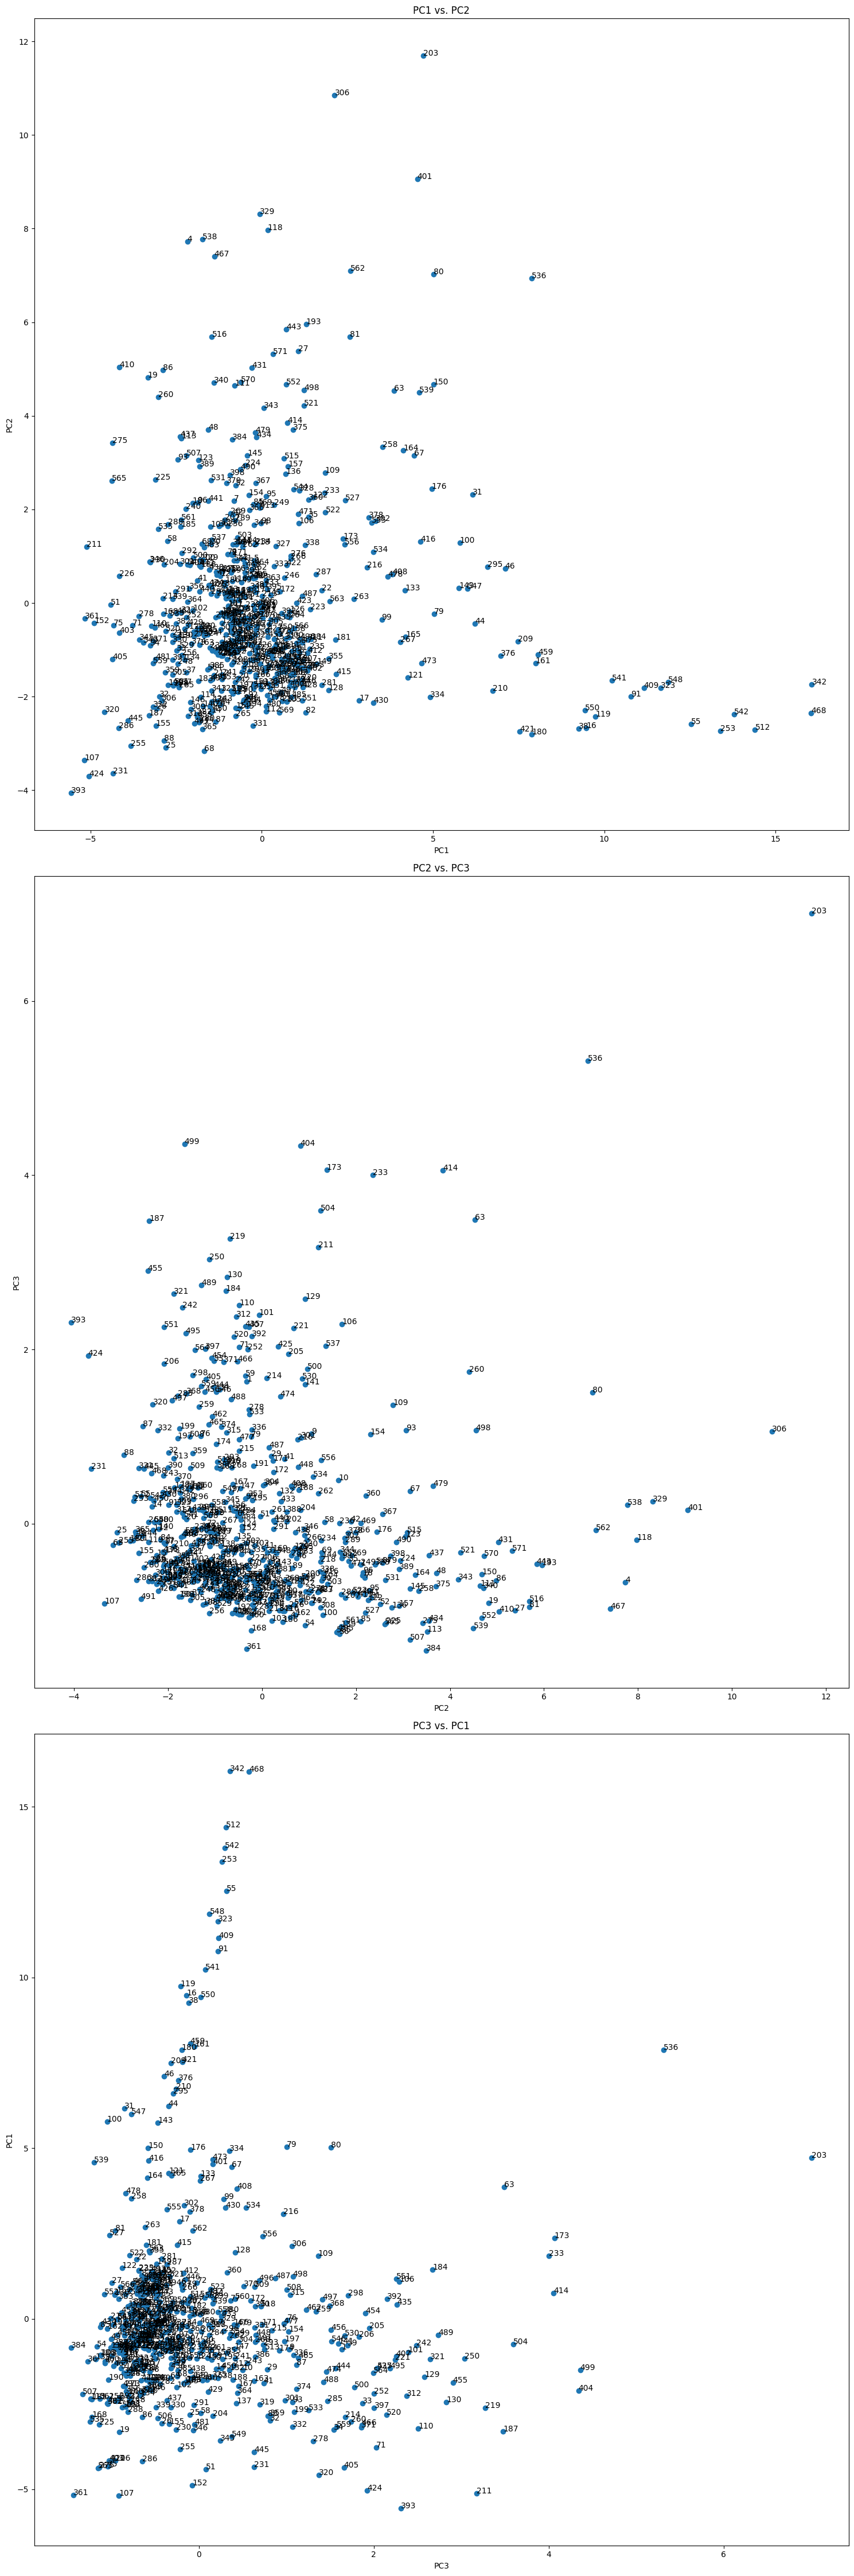

In [85]:
scores = pca.fit_transform(A)
num_pcs = 3

fig, axes = plt.subplots(num_pcs,1,figsize=(15, 45))

for i in range(num_pcs):
    pc1 = i
    pc2 = (i + 1) % num_pcs

    scatter = axes[i].scatter(scores[:, pc1], scores[:, pc2])
    axes[i].set_xlabel(f"PC{pc1 + 1}")
    axes[i].set_ylabel(f"PC{pc2 + 1}")
    axes[i].set_title(f"PC{pc1 + 1} vs. PC{pc2 + 1}")

    # Add labels for each data point
    for j, (x, y) in enumerate(zip(scores[:, pc1], scores[:, pc2])):
        axes[i].text(x, y, str(j + 1))

plt.tight_layout()
plt.show()

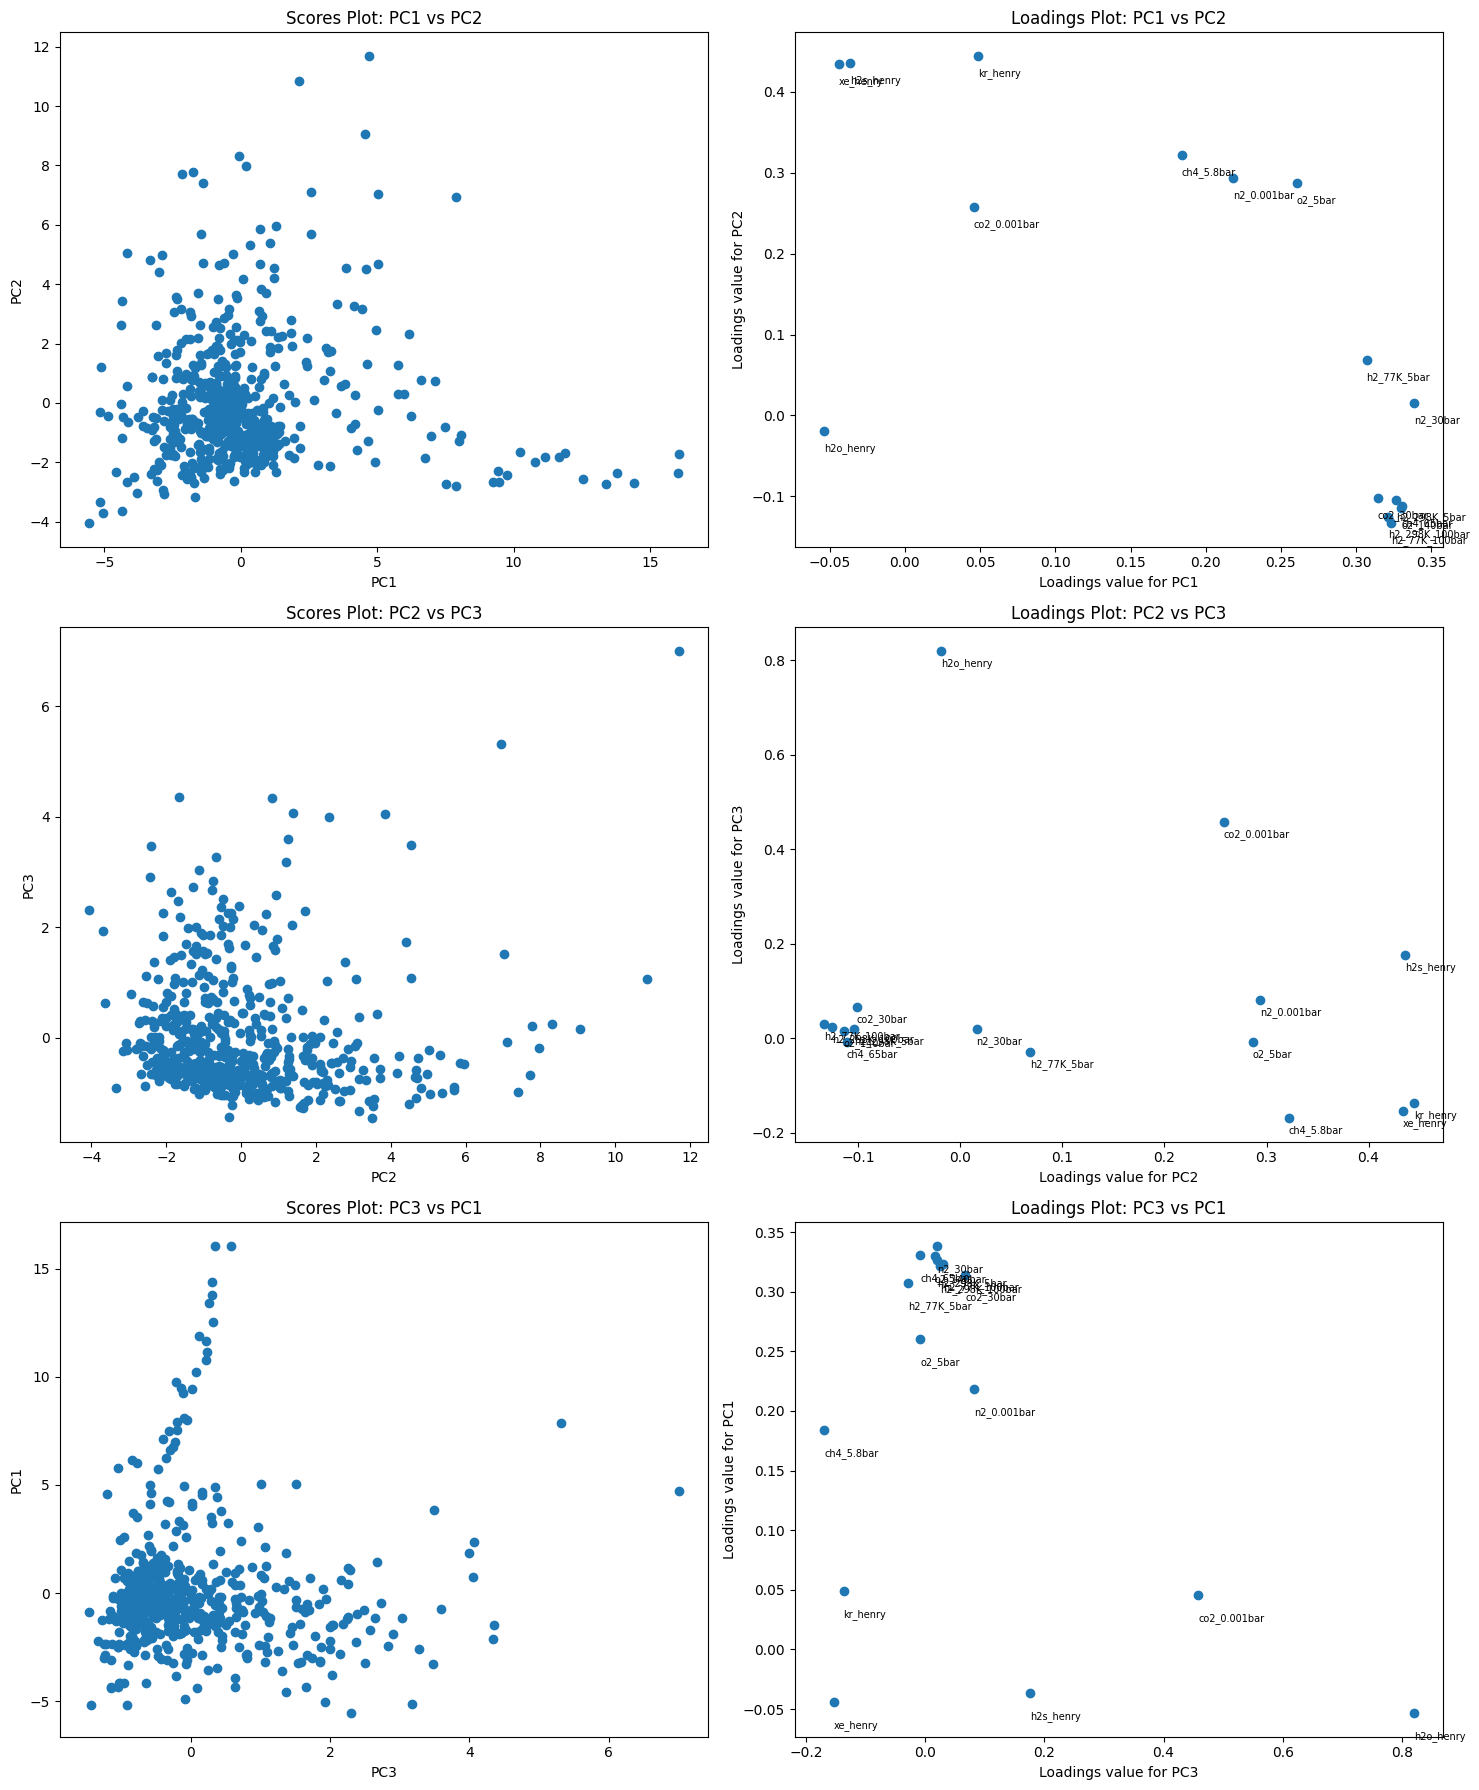

In [86]:
loadings = pca.components_
variable_names = df.columns
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

for i in range(3):
    pc1 = i
    pc2 = (i + 1) % 3
    pc3 = (i + 2) % 3

    axes[i, 0].scatter(scores[:, pc1], scores[:, pc2])
    axes[i, 0].set_xlabel(f"PC{pc1 + 1}")
    axes[i, 0].set_ylabel(f"PC{pc2 + 1}")
    axes[i, 0].set_title(f"Scores Plot: PC{pc1 + 1} vs PC{pc2 + 1}")

    loadings_pc1 = np.array(loadings[pc1, :])
    loadings_pc2 = np.array(loadings[pc2, :])

    axes[i, 1].scatter(loadings_pc1, loadings_pc2)
    axes[i, 1].set_xlabel(f"Loadings value for PC{pc1 + 1}")
    axes[i, 1].set_ylabel(f"Loadings value for PC{pc2 + 1}")
    axes[i, 1].set_title(f"Loadings Plot: PC{pc1 + 1} vs PC{pc2 + 1}")

    # Annotate variable names
    for j, variable in enumerate(variable_names):
        axes[i, 1].annotate(variable, (loadings_pc1[j], loadings_pc2[j]),
                            va='top', fontsize=7, xytext=(loadings_pc1[j], loadings_pc2[j] - 0.015))

plt.tight_layout()
plt.show()


In [87]:
variable_names

Index(['o2_5bar', 'o2_140bar', 'co2_0.001bar', 'co2_30bar', 'n2_0.001bar',
       'n2_30bar', 'h2_77K_5bar', 'h2_77K_100bar', 'h2_298K_5bar',
       'h2_298K_100bar', 'ch4_65bar', 'ch4_5.8bar', 'h2o_henry', 'h2s_henry',
       'xe_henry', 'kr_henry'],
      dtype='object')

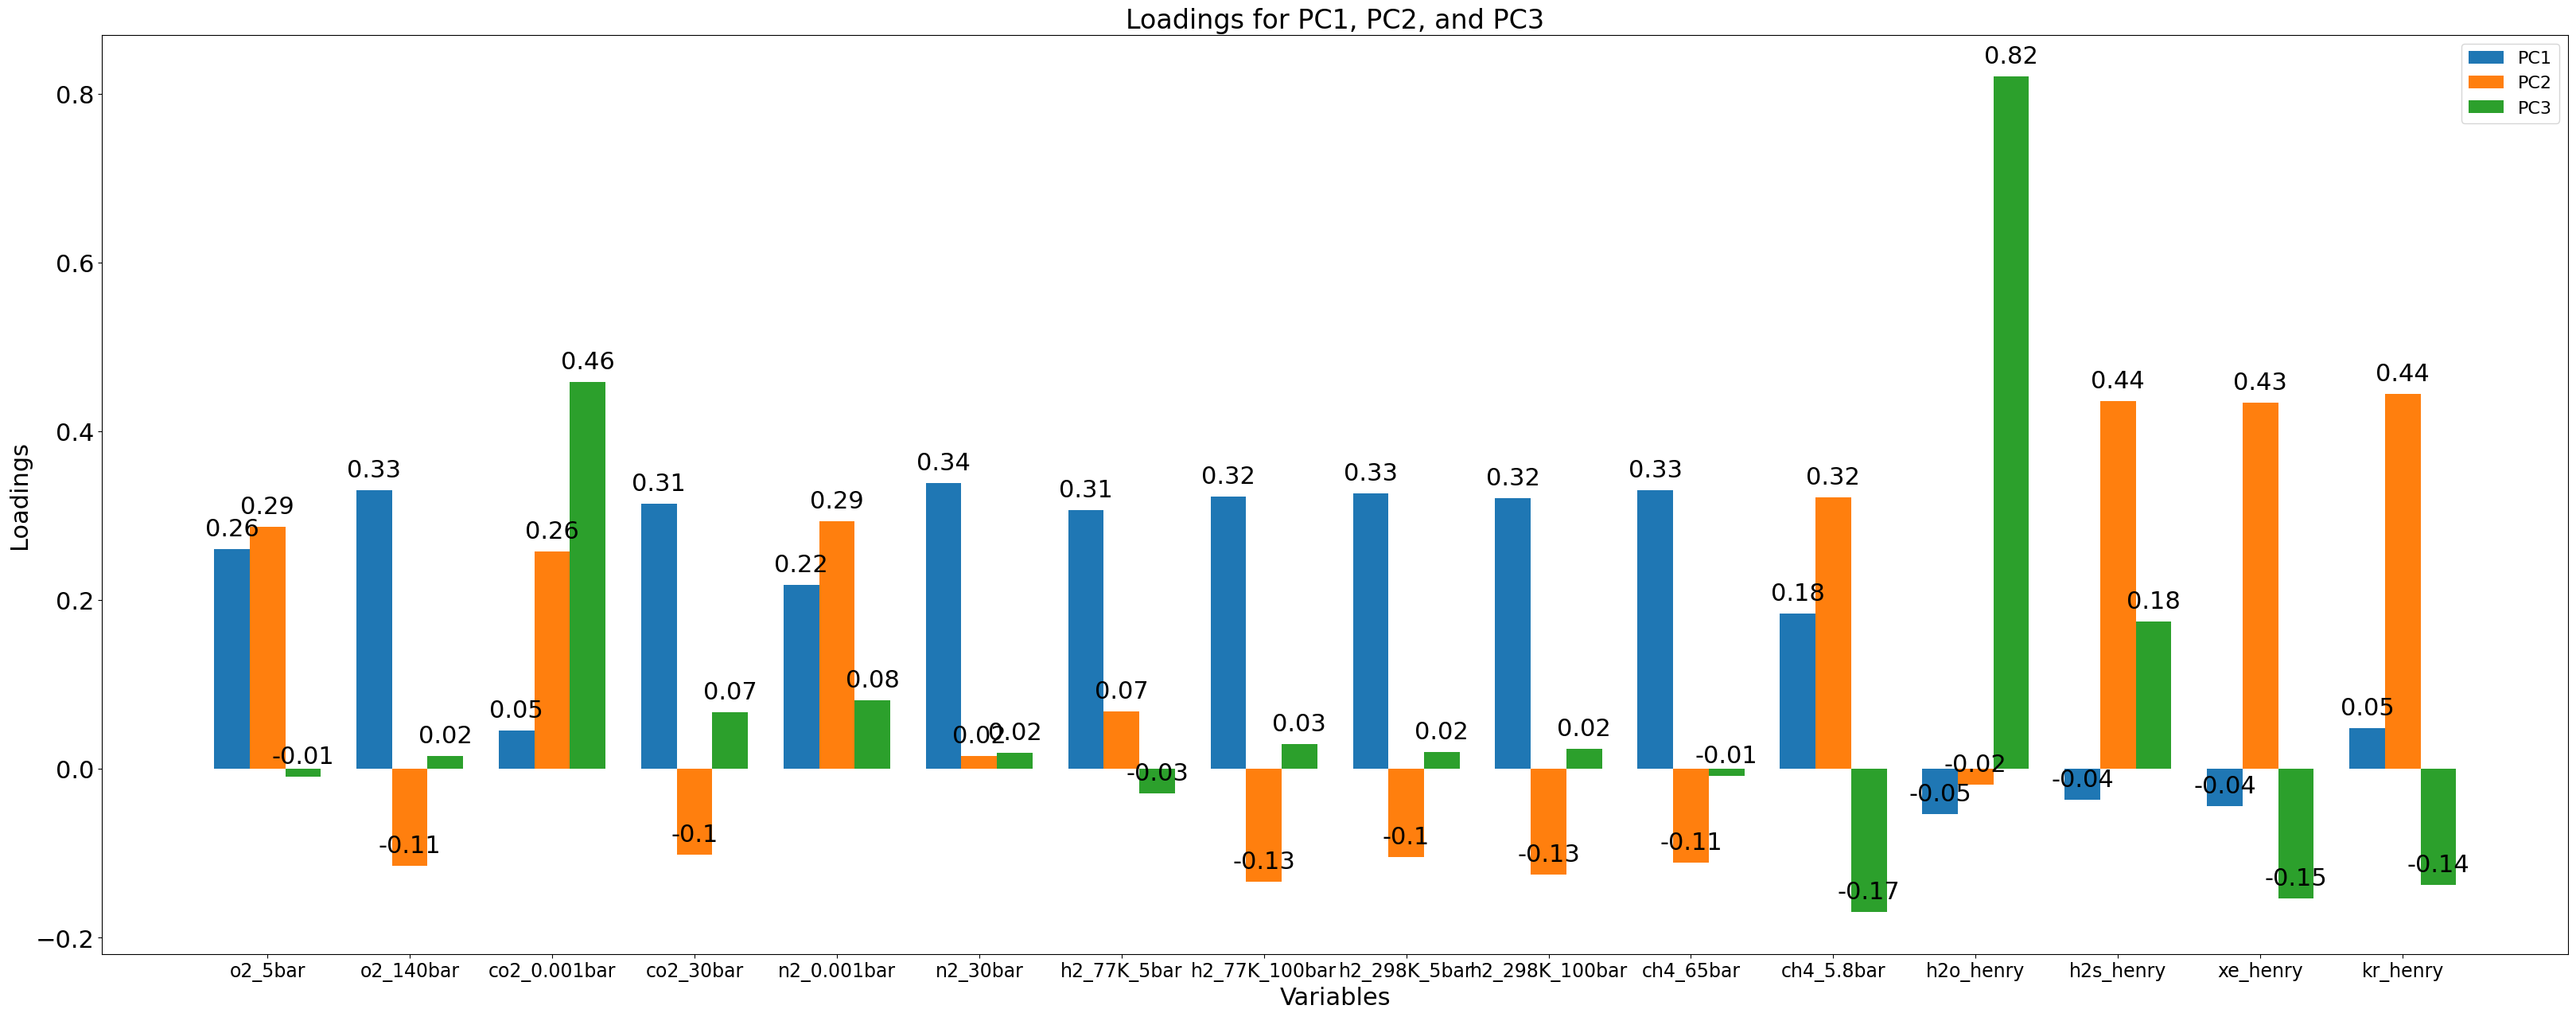

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming loadings and df are defined before this code snippet

num_variables = loadings.shape[1]
fig, ax = plt.subplots(figsize=(40, 15))

bar_positions = np.arange(num_variables)
bar_width = 0.25
for pc in range(loadings.shape[0]):
    bars = ax.bar(bar_positions + pc * bar_width, loadings[pc, :], width=bar_width, label=f'PC{pc + 1}')
    for bar in bars:
        yval = bar.get_height()
        fontsize = 22 if -1 <= yval <= 1 else 15  # Adjust the font size based on the y-value range
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=fontsize)

ax.set_xlabel('Variables', fontsize=22)
ax.set_ylabel('Loadings', fontsize=22)
ax.set_title('Loadings for PC1, PC2, and PC3', fontsize=24)
ax.set_xticks(bar_positions + (bar_width * (loadings.shape[0] - 1)) / 2)
ax.set_xticklabels([i for i in df.columns], fontsize=17)
ax.legend(fontsize=16)

# Increase the font size for y-axis tick labels
ax.tick_params(axis='y', labelsize=22)

plt.show()


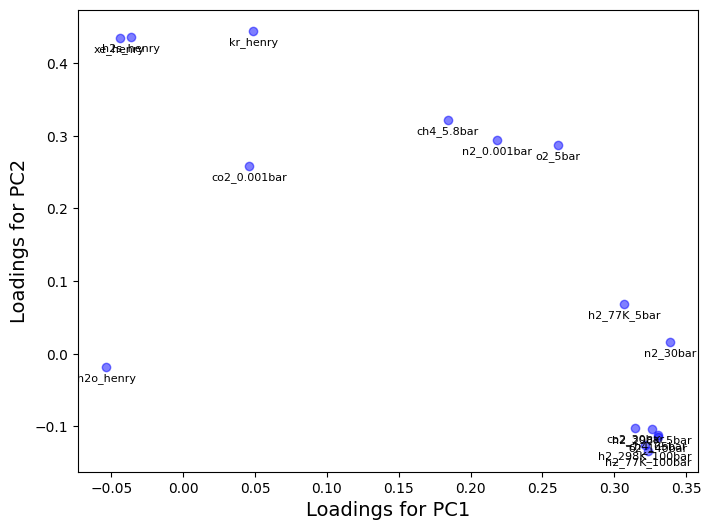

In [89]:
import matplotlib.pyplot as plt

pca1_loadings = loadings[0, :]
pca2_loadings = loadings[1, :]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca1_loadings, pca2_loadings, color='blue', alpha=0.5)
plt.xlabel('Loadings for PC1', fontsize=14)
plt.ylabel('Loadings for PC2', fontsize=14)

# Manually adjust the distance between text and points
offset = -0.008

# Annotate points with variable names below the points
for i, txt in enumerate(variable_names):
    plt.annotate(txt, (pca1_loadings[i], pca2_loadings[i] + offset), fontsize=8, ha='center', va='top')

# Save the plot as a JPEG image
# plt.savefig('loadings_plot1.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [90]:
# from google.colab import files
# files.download('/content/loadings_plot1.jpg')

MISSING VALUE PROBLEM

In [91]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [92]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 29 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_hh1n7z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [93]:
A

array([[-0.34245023, -0.13554957, -0.12482951, ...,  0.23143167,
        -0.02782335, -0.21195803],
       [-0.10292137, -0.32374389, -0.13390933, ...,  0.42743322,
         0.65219484,  0.48156778],
       [ 0.07492106,  0.51773534, -0.26756666, ..., -0.65535772,
        -0.5452968 , -0.36763323],
       ...,
       [ 1.11597482, -0.81613127,  0.38406032, ...,  1.78866356,
         2.00401787,  1.97011821],
       [ 1.33182773, -0.49329099,  0.75209444, ...,  2.31069   ,
         2.61818426,  2.33635532],
       [-0.16585774,  0.24072324, -0.27827858, ..., -0.84270815,
        -0.70460482, -0.54738989]])

In [94]:
def sim_data_collection(theta, n_m, n_p, A):
    X = A
    nb_observed = int(np.floor(theta * n_m * n_p))

    all_tuples = np.array([(m,p) for m in range(0, n_m ) for p in range(0, n_p)])
    np.random.shuffle(all_tuples)  # Shuffle the array

    ids_obs = all_tuples[:nb_observed]
    ids_unobs = all_tuples[nb_observed:]

    X_theta = np.full((n_m, n_p), np.nan)
    for (m,p) in ids_obs:
        X_theta[m-1, p-1] = X[m-1, p-1]
    for (m,p) in ids_unobs:
        X_theta[m-1, p-1] = np.NaN

    return X_theta, ids_obs, ids_unobs,all_tuples

In [95]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [96]:
theta=0.5

In [97]:
h2o_df.insert_missing_values(fraction = 1-theta, seed = 1234)

Insert Missing Values progress: |████████████████████████████████████████████████| (done) 100%


o2_5bar,o2_140bar,co2_0.001bar,co2_30bar,n2_0.001bar,n2_30bar,h2_77K_5bar,h2_77K_100bar,h2_298K_5bar,h2_298K_100bar,ch4_65bar,ch4_5.8bar,h2o_henry,h2s_henry,xe_henry,kr_henry
-0.34245,-0.13555,nan,-0.342471,-0.379907,-0.395084,-0.244487,nan,-0.152585,nan,nan,-0.390462,nan,0.231432,nan,-0.211958
nan,nan,-0.133909,nan,nan,nan,nan,nan,-0.271753,-0.268785,-0.35409,0.115262,-0.748941,nan,nan,nan
0.0749211,0.517735,-0.267567,nan,-0.0894247,0.193598,0.465079,nan,0.494984,nan,0.554478,nan,nan,-0.655358,-0.545297,nan
1.38752,-1.28443,nan,-1.54159,2.68788,-0.912869,-1.41166,nan,-0.83713,nan,nan,0.109414,-0.65607,3.64452,nan,nan
nan,-0.191377,nan,0.158374,0.318785,0.0916215,-0.223956,-0.246756,nan,nan,-0.0885784,0.329262,nan,nan,0.474369,nan
nan,nan,nan,-0.470615,nan,nan,nan,nan,-0.41619,nan,nan,nan,nan,nan,nan,nan
nan,nan,-0.0365568,-0.620664,0.914499,nan,nan,nan,-0.5857,-0.612402,-0.477249,0.944692,nan,0.868645,0.996769,0.849803
nan,-0.496141,-0.23656,nan,nan,nan,nan,nan,nan,-0.548487,-0.478898,0.4862,-0.79695,nan,nan,nan
0.0257477,-0.281797,0.237547,nan,nan,nan,-0.298965,-0.253024,nan,nan,-0.26706,nan,1.31946,0.740547,nan,0.548483
nan,nan,0.0581874,-0.531287,0.0217668,nan,-0.348179,nan,-0.580783,-0.62509,nan,nan,0.761983,nan,nan,0.713126


In [98]:
theta_df = h2o_df.as_data_frame()
A_theta = np.array(theta_df)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [99]:
rows, cols = A_theta.shape
ids_obs = []
ids_unobs = []

for row in range(rows):
    for col in range(cols):
        value = A_theta[row, col]
        if np.isnan(value):
            ids_unobs.append((row, col))
        else:
            ids_obs.append((row, col))

print("Observed Entries (ids_obs):", ids_obs)
print("Unobserved Entries (ids_unobs):", ids_unobs)

Observed Entries (ids_obs): [(0, 0), (0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (0, 11), (0, 13), (0, 15), (1, 2), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 0), (2, 1), (2, 2), (2, 4), (2, 5), (2, 6), (2, 8), (2, 10), (2, 13), (2, 14), (3, 0), (3, 1), (3, 3), (3, 4), (3, 5), (3, 6), (3, 8), (3, 11), (3, 12), (3, 13), (4, 1), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 10), (4, 11), (4, 14), (5, 3), (5, 8), (6, 2), (6, 3), (6, 4), (6, 8), (6, 9), (6, 10), (6, 11), (6, 13), (6, 14), (6, 15), (7, 1), (7, 2), (7, 9), (7, 10), (7, 11), (7, 12), (8, 0), (8, 1), (8, 2), (8, 6), (8, 7), (8, 10), (8, 12), (8, 13), (8, 15), (9, 2), (9, 3), (9, 4), (9, 6), (9, 8), (9, 9), (9, 12), (9, 15), (10, 2), (10, 4), (10, 5), (10, 6), (10, 9), (10, 10), (10, 12), (10, 13), (10, 14), (11, 0), (11, 3), (11, 6), (11, 8), (11, 9), (11, 13), (11, 15), (12, 0), (12, 1), (12, 3), (12, 5), (12, 11), (12, 12), (13, 0), (13, 7), (13, 10), (13, 12), (14, 0), (14, 3), (14, 5), (14, 6), (14, 9), (14, 11), (14

In [100]:
theta = 0.40
n_m = 572
n_p = 16
# A_theta, ids_obs, ids_unobs,all_tuples = sim_data_collection(theta, n_m, n_p, A)

print("A_theta (Matrix with missing entries):")
print(A_theta)

A_theta (Matrix with missing entries):
[[-0.34245023 -0.13554957         nan ...  0.23143167         nan
  -0.21195803]
 [        nan         nan -0.13390933 ...         nan         nan
          nan]
 [ 0.07492106  0.51773534 -0.26756666 ... -0.65535772 -0.5452968
          nan]
 ...
 [        nan -0.81613127         nan ...  1.78866356         nan
          nan]
 [ 1.33182773 -0.49329099         nan ...         nan  2.61818426
          nan]
 [-0.16585774  0.24072324         nan ... -0.84270815         nan
          nan]]


In [101]:
print("No. of rows are:",len(A_theta))
print("No. of cols are:",len(A_theta[0]))

No. of rows are: 572
No. of cols are: 16


It is to be noted that number of missing elements (elements with value of 0) are equal to (1-theta)X 16 X 572

In [102]:
count = 0
for i in range(len(A_theta)):
    for j in range(len(A_theta[0])):
        if np.isnan(A_theta[i, j]):
            count += 1
print("The value of unobserved elements are:", count/(n_p*n_m)*100)

The value of unobserved elements are: 49.4645979020979


In [103]:
# # pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
# import h2o
# from h2o.estimators import H2OGeneralizedLowRankEstimator
# h2o.init()

OFFICIAL STANFORD GLRM Python Package (2014 version)

In [104]:
# !git clone https://github.com/Satwik1900/My-GLRM.git
# %cd My-GLRM
# !python setup.py install

# from glrm import GLRM
# from glrm.loss import QuadraticLoss
# from glrm.convergence import Convergence
# from glrm.reg import QuadraticReg
# from glrm.reg import QuadraticReg

# regX, regY = QuadraticReg(0.1), QuadraticReg(0.1)
# missing = list(ids_unobs)
# from glrm.reg import QuadraticReg
# regX, regY = QuadraticReg(0.1), QuadraticReg(0.1)

# print("QuadraticLoss:", QuadraticLoss)
# print("regX:", regX)
# print("regY:", regY)

# model = GLRM(A_theta, QuadraticLoss, regX, regY, 9, missing)
# model.fit()
# X, Y = model.factors()
# A_hat = model.predict()

# CHECKING HUBER Loss
# loss = HuberLoss
# regX, regY = QuadraticReg(0.1), QuadraticReg(0.1)
# glrm_huber = GLRM(A, loss, regX, regY, k)

# # Fit
# glrm_huber.fit()

# # Results
# X, Y = glrm_huber.factors()
# A_hat = glrm_huber.predict()

H20.ai GLRM python package

In [105]:
from h2o.estimators import H2OGeneralizedLowRankEstimator
from sklearn.metrics import mean_squared_error
# Start H2O
K=9
λ=100
# Convert your incomplete data matrix A to an H2OFrame
h2o_A = h2o_df

rp = λ/n_p
rm = λ/n_m

P0 = np.random.randn(K+1, n_p)
M0 = np.random.randn(n_m, K+1)

P0_h2o = h2o.H2OFrame(P0)
M0_h2o = h2o.H2OFrame(M0)

glrm_model = H2OGeneralizedLowRankEstimator(
    training_frame=h2o_A,
    k= K+1,
    loss="Quadratic",
    gamma_x=rm,
    gamma_y=rp,
    regularization_x="L2",
    regularization_y="L2",
    init="User",
    user_x=M0_h2o,
    user_y=P0_h2o,
)

glrm_model.train(training_frame = h2o_A, validation_frame = h2o.H2OFrame(df))

# imputed_A_h2o = glrm_model.predict(h2o_A)
# imputed_A = imputed_A_h2o.as_data_frame().values
# imputed_A = np.array(imputed_A)

# mse = mean_squared_error(A, imputed_A)
# print("Mean Squared Error:", mse)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glrm Model Build progress: |█████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLowRankEstimator : Generalized Low Rank Modeling
Model Key: GLRM_model_python_1708331705269_5


Model Summary: 
    number_of_iterations    final_step_size    final_objective_value
--  ----------------------  -----------------  -----------------------
    1000                    0.0465487          339.364

ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 47.71787852375769
Misclassification Error (Categorical): 0.0

ModelMetricsGLRM: glrm
** Reported on validation data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 1444.5598899266445
Misclassification Error (Categorical): 0.0

Scoring History: 
     timestamp            duration    iterations    step_size             objective
---  -------------------  ----------  ------------  --------------------  ------------------
     2024-02-19 08:43:40  0.042 sec   0.0           0.6666666666666666    49547.05802650817
     2024-02-19 08:43:40  0.046 sec   1.0           0.4444444444444444    49547.05802650817
     2024-02-19 08:43:40  0.061 sec   2.0           0.2222222222222222    49547.05802650817
     2024-02-19 08:43:40  0.065 sec   3.0           0.07407407407407407   49547.05802650817
     2024-02-19 08:43:40  0.068 sec   4.0           0.07777777777777778   41294.699245838114
     2024-02-19 08:43:40  0.073 sec   5.0           0.08166666666666667   33232.28584640908
     2024-02-19 08:43:40  0.077 sec   6.0           0.08575               20406.368167111643
     2024-02-19 08:43:40  0.081 sec   7.0           0.0900375             13648.326720169915
     2024-02-19 08:43:40  0.085 sec   8.0           0.09453937500000001   11565.494117268052
     2024-02-19 08:43:40  0.089 sec   9.0           0.09926634375000001   10047.683762123494
---  ---                  ---         ---           ---                   ---
     2024-02-19 08:43:45  4.608 sec   990.0         0.047259018103623006  340.15397322990606
     2024-02-19 08:43:45  4.612 sec   991.0         0.04962196900880416   340.0535544446677
     2024-02-19 08:43:45  4.616 sec   992.0         0.05210306745924437   339.9522403765445
     2024-02-19 08:43:45  4.620 sec   993.0         0.05470822083220659   339.846626739577
     2024-02-19 08:43:45  4.624 sec   994.0         0.057443631873816924  339.73874078098186
     2024-02-19 08:43:45  4.629 sec   995.0         0.06031581346750777   339.62707532882786
     2024-02-19 08:43:45  4.633 sec   996.0         0.06333160414088317   339.5179346369572
     2024-02-19 08:43:45  4.637 sec   997.0         0.06649818434792733   339.41731318524
     2024-02-19 08:43:45  4.641 sec   998.0         0.0698230935653237    339.3638926319227
     2024-02-19 08:43:45  4.645 sec   999.0         0.04654872904354913   339.3638926319227
[1000 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [106]:
# Extract Xnew and Y
# Getting the Archetypes (Y)
Y = glrm_model.archetypes()

# Getting the Coefficients (X) for the training set
X = glrm_model.transform_frame(h2o_A).as_data_frame().values

X = np.array(X)
Y = np.array(Y)

print("X:")
print(X.shape)

print("\nY (Archetypes):")
print(Y.shape)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
X:
(572, 10)

Y (Archetypes):
(10, 16)


In [107]:
B = np.dot(X, Y)
mse = mean_squared_error(A, B)
mse

0.10554974760654445

Github Repository of GLRM python package (2018)

In [108]:
# ! pip install git+https://github.com/udellgroup/pyglrm --user

START OF MISSING VALUE PROBLEM

Creating the Fit_lrm function

In [109]:
def fit_lrm(A_theta, λ, K, P0=None, M0=None):
    A_theta_h2o = h2o_df

    n_p = len(A_theta[0])
    n_m = len(A_theta)
    P, M, best_model = None, None, None
    best_mse = float('inf')

    rp = λ/n_p
    rm = λ/n_m

        # guess for the latent property and material vectors, respectively.
        # helpful from a speed standpoint
    if P0 is None:
      P0 = np.random.randn(K+1, n_p)
    if M0 is None:
      M0 = np.random.randn(n_m, K+1)

    P0_h2o = h2o.H2OFrame(P0)
    M0_h2o = h2o.H2OFrame(M0)

        # Create GLRM model
    glrm_model = H2OGeneralizedLowRankEstimator(training_frame=A_theta_h2o,
                                                    k= K+1,
                                                    loss="Quadratic",
                                                    gamma_x=rm,
                                                    gamma_y=rp,
                                                    regularization_x="L2",
                                                    regularization_y="L2",
                                                    init="User",
                                                    user_x=M0_h2o,
                                                    user_y=P0_h2o,
                                                )
    glrm_model.train()
    P = glrm_model.archetypes()
    # Get the Coefficients (X) for the training set
    M = glrm_model.transform_frame(A_theta_h2o).as_data_frame().values
    imputed_A = np.dot(M, P)

        # Calculate MSE
    mse = mean_squared_error(A, imputed_A)

        # if mse < best_mse:
        #     best_mse = mse
    A_final, best_model = imputed_A, glrm_model

    # assert P.shape == (hp.k + 1, n_p)
    # assert M.shape == (n_m, hp.k + 1)

    return A_final, best_model, M, P

Making a class of HyperParam

In [110]:
def fit_bias_only_lrm(X_theta, λ, K):
  A_final_bias, bias_model, M_bias, P_bias = fit_lrm(X_theta,λ, K, P0=None, M0=None)
  return A_final_bias, bias_model

In [111]:
A_final_bias, bias_model = fit_bias_only_lrm(A_theta, 0, 0)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glrm Model Build progress: |█████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [112]:
A_final_bias.shape

(572, 16)

Making the hyperparameter sweep function

In [113]:
# import math
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from scipy.stats import pearsonr, spearmanr

# best_rmse = float('inf')
# k = 3
# # Defining metrics to store for all possible values of lambda and k
# Mae = []
# Rmse = []
# pearson = []
# spearmann = []
# R2 = []
# A_flatten = A.flatten()

# best_lambda = None
# best_k = None
# best_imputed_A = None
# best_model = None
# for k in range(1,16):
#   for λ in range(10,51,10):
#               imputed_A, model, M, P = fit_lrm(A_theta, λ, k, P0=None, M0=None)
#               imputed_A_flatten = imputed_A.flatten()
#               rmse = math.sqrt(mean_squared_error(A, imputed_A))
#               Mae.append(mean_absolute_error(A, imputed_A))
#               R2.append(r2_score(A, imputed_A))
#               Rmse.append(math.sqrt(mean_squared_error(A, imputed_A)))
#               pearson.append(pearsonr(A_flatten, imputed_A_flatten)[0])
#               spearmann.append(spearmanr(A_flatten, imputed_A_flatten)[0])

#               if rmse < best_rmse:
#                   best_rmse = rmse
#                   best_lambda = λ
#                   best_k = k
#                   best_imputed_A = imputed_A
#                   best_model = model

Results after hyperparametre sweep

In [114]:
best_k = 10
best_lambda = 40

In [115]:
A_imputed, model, M, P = fit_lrm(A_theta, best_lambda, best_k, P0=None, M0=None)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glrm Model Build progress: |█████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [116]:
best_k

10

METRICS FOR GLRM MODEL

Pearson's Correlation Coefficient

In [117]:
# from tabulate import tabulate

# pearson = np.array(pearson)
# pearson = pearson.reshape(15, 5)

# header = ["Lambda"] + [str(j) for j in range(10, 51, 10)]
# table_data = []

# for i in range(1, 16):
#     row = [f"K={i}"]
#     row += [str(pearson[i - 1, j]) for j in range(5)]
#     table_data.append(row)
# #
# table = tabulate(table_data, headers=header, tablefmt="grid")
# print(table)

In [118]:
line_colors = ['red', 'green', 'blue', 'orange', 'purple']

for j in range(5):
    plt.plot(range(1, 16), pearson[:, j], label=f"Lambda={10 * (j + 1)}", marker='o', color=line_colors[j])

plt.xlabel("Rank (K)")
plt.ylabel("Pearson's Correlation Coefficient")
plt.title("Pearson's Correlation vs Rank")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'pearson' is not defined

Spearman's Rank Correlation Coefficient

In [ ]:
from tabulate import tabulate
spearmann = np.array(spearmann)
spearmann = spearmann.reshape(15, 5)

header = ["Lambda"] + [str(j) for j in range(10, 51, 10)]
table_data = []

for i in range(1, 16):
    row = [f"K={i}"]
    row += [str(spearmann[i - 1, j]) for j in range(5)]
    table_data.append(row)

table = tabulate(table_data, headers=header, tablefmt="grid")
print(table)

In [ ]:
line_colors = ['red', 'green', 'blue', 'orange', 'purple']

for j in range(5):
    plt.plot(range(1, 16), spearmann[:, j], label=f"Lambda={10 * (j + 1)}", marker='o', color=line_colors[j])
plt.xlabel("Rank (K)")
plt.ylabel("Spearmann's Correlation Coefficient")
plt.title("Spearmann's Correlation vs Rank")
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error (MAE)

In [ ]:
from tabulate import tabulate
mae = np.array(Mae)
mae = mae.reshape(15, 5)

header = ["Lambda"] + [str(j) for j in range(10, 51, 10)]
table_data = []

for i in range(1, 16):
    row = [f"K={i}"]
    row += [str(mae[i - 1, j]) for j in range(5)]
    table_data.append(row)

table = tabulate(table_data, headers=header, tablefmt="grid")
print(table)

max_index = np.argmax(pearson)
max_i, max_j = np.unravel_index(max_index, pearson.shape)

max_K = max_i + 1
max_lambda = (max_j + 1) * 10

# print(f"Maximum value of MAE: {pearson[max_i, max_j]} at K={max_K} and Lambda={max_lambda}")

In [ ]:
line_colors = ['red', 'green', 'blue', 'orange', 'purple']

for j in range(5):
    plt.plot(range(1, 16), mae[:, j], label=f"Lambda={10 * (j + 1)}", marker='o', color=line_colors[j])
plt.xlabel("Rank (K)")
plt.ylabel("MAE")
plt.title("MAE vs Rank")
plt.yticks([0, 1])
plt.legend()
plt.grid(True)
plt.show()

Root Mean Squared Error

In [ ]:
from tabulate import tabulate
rmse = np.array(Rmse)
rmse = rmse.reshape(15, 5)

header = ["Lambda"] + [str(j) for j in range(10, 51, 10)]
table_data = []

for i in range(1, 16):
    row = [f"K={i}"]
    row += [str(rmse[i - 1, j]) for j in range(5)]
    table_data.append(row)

table = tabulate(table_data, headers=header, tablefmt="grid")
print(table)

In [ ]:
line_colors = ['red', 'green', 'blue', 'orange', 'purple']

for j in range(5):
    plt.plot(range(1, 16), rmse[:, j], label=f"Lambda={10 * (j + 1)}", marker='o', color=line_colors[j])
plt.xlabel("Rank (K)")
plt.ylabel("RMSE")
plt.title("RMSE vs Rank")
plt.legend()
plt.grid(True)
plt.show()

In [119]:
h2o_df_1 = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [120]:
A_theta_1 = h2o_df.as_data_frame()
A_theta_1 = np.array(A_theta_1)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [121]:
A_measured, model_1, M_1, P_1 = fit_lrm(A_theta_1, best_lambda, best_k, P0=None, M0=None)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glrm Model Build progress: |█████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


Parity Plot with data missing

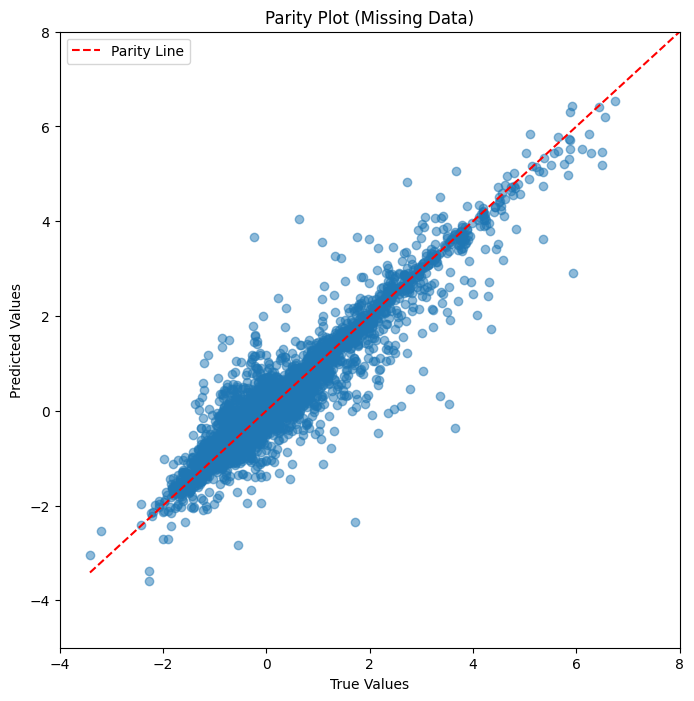

In [122]:
A_flat = A.flatten()
imputed_A_flat = A_imputed.flatten()

plt.figure(figsize=(8, 8))
plt.scatter(A_flat, imputed_A_flat, alpha=0.5)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot (Missing Data)')
plt.xlim(-4, 8)
plt.ylim(-5, 8)
# Plotting my parity plot at line (y = x)
plt.plot([min(A_flat), max(A_flat)], [min(A_flat), max(A_flat)], linestyle='--', color='red', label='Parity Line')
plt.legend()
plt.show()

Parity Plot with no data missing

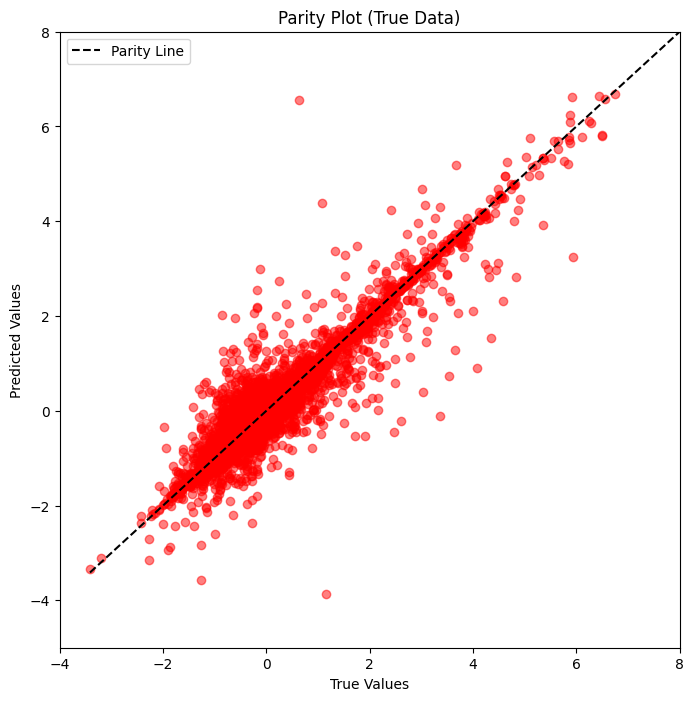

In [123]:
A_flat_1 = A.flatten()
imputed_A_flat_1 = A_measured.flatten()

plt.figure(figsize=(8, 8))
plt.scatter(A_flat_1, imputed_A_flat_1, alpha=0.5, color='red')  # Set the color to red

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot (True Data)')
plt.xlim(-4, 8)
plt.ylim(-5, 8)

# Plotting the parity line with red color
plt.plot([min(A_flat_1), max(A_flat_1)], [min(A_flat_1), max(A_flat_1)], linestyle='--', color='black', label='Parity Line')

plt.legend()
plt.show()


Combined parity plot

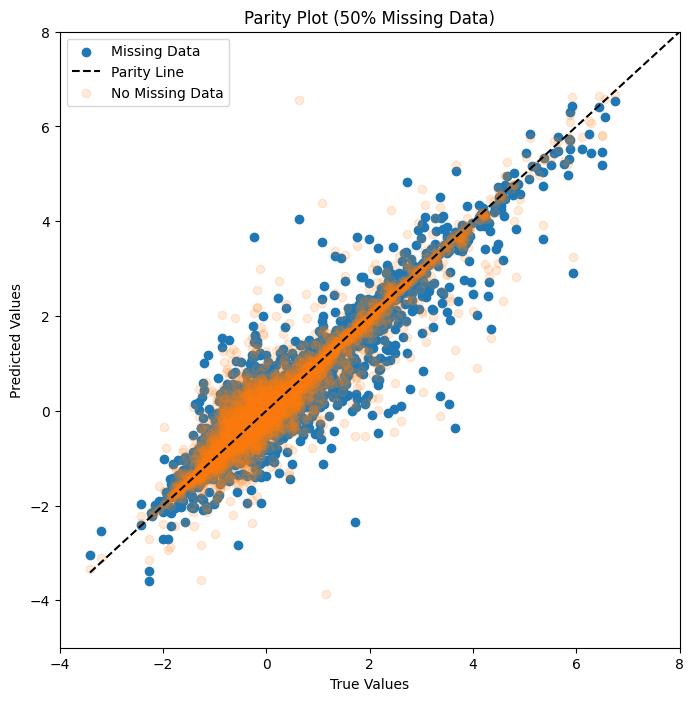

In [124]:
# Parity Plot (Missing Data)
A_flat = A.flatten()
imputed_A_flat = A_imputed.flatten()

plt.figure(figsize=(8, 8))
plt.scatter(A_flat, imputed_A_flat, label='Missing Data')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot (50% Missing Data)')
plt.xlim(-4, 8)
plt.ylim(-5, 8)
# Plotting the parity line (y = x)
plt.plot([min(A_flat), max(A_flat)], [min(A_flat), max(A_flat)], linestyle='--', color='black', label='Parity Line')

# Parity Plot (True Data)
A_flat_1 = A.flatten()
imputed_A_flat_1 = A_measured.flatten()

plt.scatter(A_flat_1, imputed_A_flat_1, alpha=0.15, label='No Missing Data')
plt.legend()
plt.show()

In [ ]:
theta

In [ ]:
# def my_hist(x, label, color):
#     ax0 = plt.gca()
#     ax = ax0.twinx()

#     sns.despine(ax=ax, left=True, top=True, right=False)
#     ax.yaxis.tick_right()
#     ax.set_ylabel('Counts')

#     ax.hist(x, label=label, color=color)

# plt.figure(figsize=(6, 6))
# g = sns.PairGrid(df, corner=True, height=1.2)
# g.map_diag(my_hist)
# g.map_lower(sns.scatterplot)

# plt.savefig("scatterplot_matrix.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [ ]:
# from google.colab import files
# files.download('/content/scatterplot_matrix.pdf')

In [ ]:
from scipy.stats import spearmanr, pearsonr

num_columns = df.shape[1]
correlation_coefficients = []
correlation_coefficients2 = []

for i in range(0, num_columns):
    # Select entries with the second element equal to i
    unobserved_entries = [entry for entry in ids_unobs if entry[1] == i]
    origin = []
    imputed = []
    for val in unobserved_entries:
        origin.append(A[val[0]][val[1]])
        imputed.append(A_imputed[val[0]][val[1]])

    # Calculate Spearman correlation coefficient once for each property
    rho, p = spearmanr(origin, imputed)
    correlation_coefficients.append(rho)
    rho2, p2 = pearsonr(origin, imputed)
    correlation_coefficients2.append(rho2)

In [ ]:
plt.figure(figsize=(16, 6))

bar_width = 2
positions = [i * (bar_width ) for i in range(len(df.columns))]
plt.bar(positions, correlation_coefficients, color='blue')

plt.xticks(positions, df.columns, fontsize=7)

plt.title("Spearman's Correlation Coefficient for each property")
plt.xlabel("Property")
plt.ylabel("Spearman's Correlation Coefficient")
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))

bar_width = 2
positions = [i * (bar_width) for i in range(len(df.columns))]
plt.bar(positions, correlation_coefficients2, color='blue')

plt.xticks(positions, df.columns, fontsize=7)

plt.title("Pearson's Correlation Coefficient for each property")
plt.xlabel("Property")
plt.ylabel("Pearson's Correlation Coefficient")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# mu = M.T[-1, :]
# mu1 = np.sort(mu)[::-1][:10]
# ids_sort = np.argsort(mu)[::-1][:10]
# top_cof_names = materials[ids_sort]

# # Bar plot for the top 10 biases with COF names
# fig, ax = plt.subplots(figsize=(10, 6))

# width = 0.8
# spacing = 0.2
# l = np.arange(len(mu1))

# ax.bar(x, mu1, width=width, color='C3')

# ax.set_xticks(l)
# ax.set_xticklabels(x, rotation=45, ha='right')

# # Labels and title
# ax.set_xlabel('COF Names')
# ax.set_ylabel('Material Bias')
# ax.set_title('Top 10 Material Biases with COF Names')

# plt.tight_layout()
# plt.show()

In [ ]:
x = ["2D-BPTA-COF", "TPE-COF-OH", "SIOC-COF-7", "Banerjee's PY-COF", "Py-Azine COF", "TAPB-TFPA", "JUC-531", "3D-TPB-COF-H", "DAPO-TpOMe-COF", "DPP2-HHTP"]

In [ ]:
# h2o.shutdown()

3D SCATTER PLOTS

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

selected_columns = ['ch4_65bar', 'h2s_henry', 'h2o_henry']
selected_data = df[selected_columns]

x1 = df['ch4_65bar']
y1 = df['h2s_henry']
z1 = df['h2o_henry']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1)

# Set labels for the axes
ax.set_xlabel('ch4_65bar')
ax.set_ylabel('h2s_henry')
ax.set_zlabel('h2o_henry')

# Adjust the viewing angle for better visibility
ax.view_init(elev=20, azim=74)  # You can experiment with different angles

# Show the plot
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
selected_columns = ['o2_5bar', 'h2s_henry', 'kr_henry']
selected_data = df[selected_columns]
x1 = df['o2_5bar']
y1 = df['h2s_henry']
z1 = df['kr_henry']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,y1,z1)

# Set labels for the axes
ax.set_xlabel('O2_5bar')
ax.set_ylabel('H2s_henry')
ax.set_zlabel('Kr_henry')
ax.view_init(elev=20, azim=74)
plt.savefig('3D_ScatterPlot_Linear.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# from google.colab import files
# files.download('/content/3D_ScatterPlot_Linear.jpg')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
selected_columns = ['ch4_5.8bar', 'xe_henry', 'co2_30bar']
selected_data = df[selected_columns]
x1 = df['ch4_5.8bar']
y1 = df['xe_henry']
z1 = df['co2_30bar']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,y1,z1)

# Set labels for the axes
ax.set_xlabel('Ch4_5.8bar')
ax.set_ylabel('Xe_henry')
ax.set_zlabel('Co2_30bar')
ax.view_init(elev=20, azim=74)
plt.savefig('3D_ScatterPlot_Nonlinear.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# from google.colab import files
# files.download('/content/3D_ScatterPlot_Nonlinear.jpg')

In [ ]:
df.columns

TO BE REMOVED

In [ ]:
# np.random.seed(42)

# # Number of samples per class
# num_samples = 100

# # Class 1: Linearly separable
# class1_mean = [2, 2]
# class1_cov = [[1, 0.8], [0.8, 1]]
# class1_data = np.random.multivariate_normal(class1_mean, class1_cov, num_samples)

# # Class 2: Linearly separable
# class2_mean = [6, 6]
# class2_cov = [[1, -0.8], [-0.8, 1]]
# class2_data = np.random.multivariate_normal(class2_mean, class2_cov, num_samples)

# # Combine the two classes
# X = np.vstack([class1_data, class2_data])
# y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# # Plot the original data
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
# plt.title('Original Data (Two Classes)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()
